import packages

In [1]:

# basic library
import numpy as np
import xarray as xr
import datetime
import glob
import os
os.chdir('/home/users/qino')
import sys  # print(sys.path)
sys.path.append('/home/users/qino')

# plot
import matplotlib.path as mpath
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import patches
import matplotlib.ticker as mticker
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import BoundaryNorm
from matplotlib import cm
import cartopy as ctp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
mpl.rcParams['figure.dpi'] = 600
plt.rcParams['pcolor.shading'] = 'auto'
mpl.rc('font', family='Times New Roman', size=10)
plt.rcParams.update({"mathtext.fontset": "stix"})
os.environ['CARTOPY_USER_BACKGROUNDS'] = 'data_source/bg_cartopy'
from matplotlib.colors import ListedColormap

# data analysis
import dask
dask.config.set({"array.slicing.split_large_chunks": False})
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
from geopy import distance

# add ellipse
from scipy import linalg
from scipy import stats
from sklearn import mixture
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# self defined
from a00_basic_analysis.b_module.mapplot import (
    ticks_labels,
    scale_bar,
    framework_plot1,
    hemisphere_plot,
)

import warnings
warnings.filterwarnings('ignore')


Prepare monthly sea ice

In [2]:
era5_mon_sl_79_21_sic = xr.open_dataset(
    'bas_palaeoclim_qino/observations/reanalysis/ERA5/mon_sl_79_present/era5_mon_sl_79_21_sic.nc')

lon = era5_mon_sl_79_21_sic.longitude.values
lat = era5_mon_sl_79_21_sic.latitude.values
siconc = xr.concat((
    era5_mon_sl_79_21_sic.siconc[:-2, 0, :, :],
    era5_mon_sl_79_21_sic.siconc[-2:, 1, :, :]), dim='time')

month_length = era5_mon_sl_79_21_sic.time.dt.days_in_month

# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") /
    month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby(
    "time.season").sum().values, np.ones(4))

# Calculate the weighted average
siconc_weighted = (siconc * weights).groupby("time.season").sum(dim="time")

# unweighted values for comparisons
siconc_unweighted = siconc.groupby("time.season").mean("time")
siconc_diff = siconc_weighted - siconc_unweighted

Plot sea ice in DJF

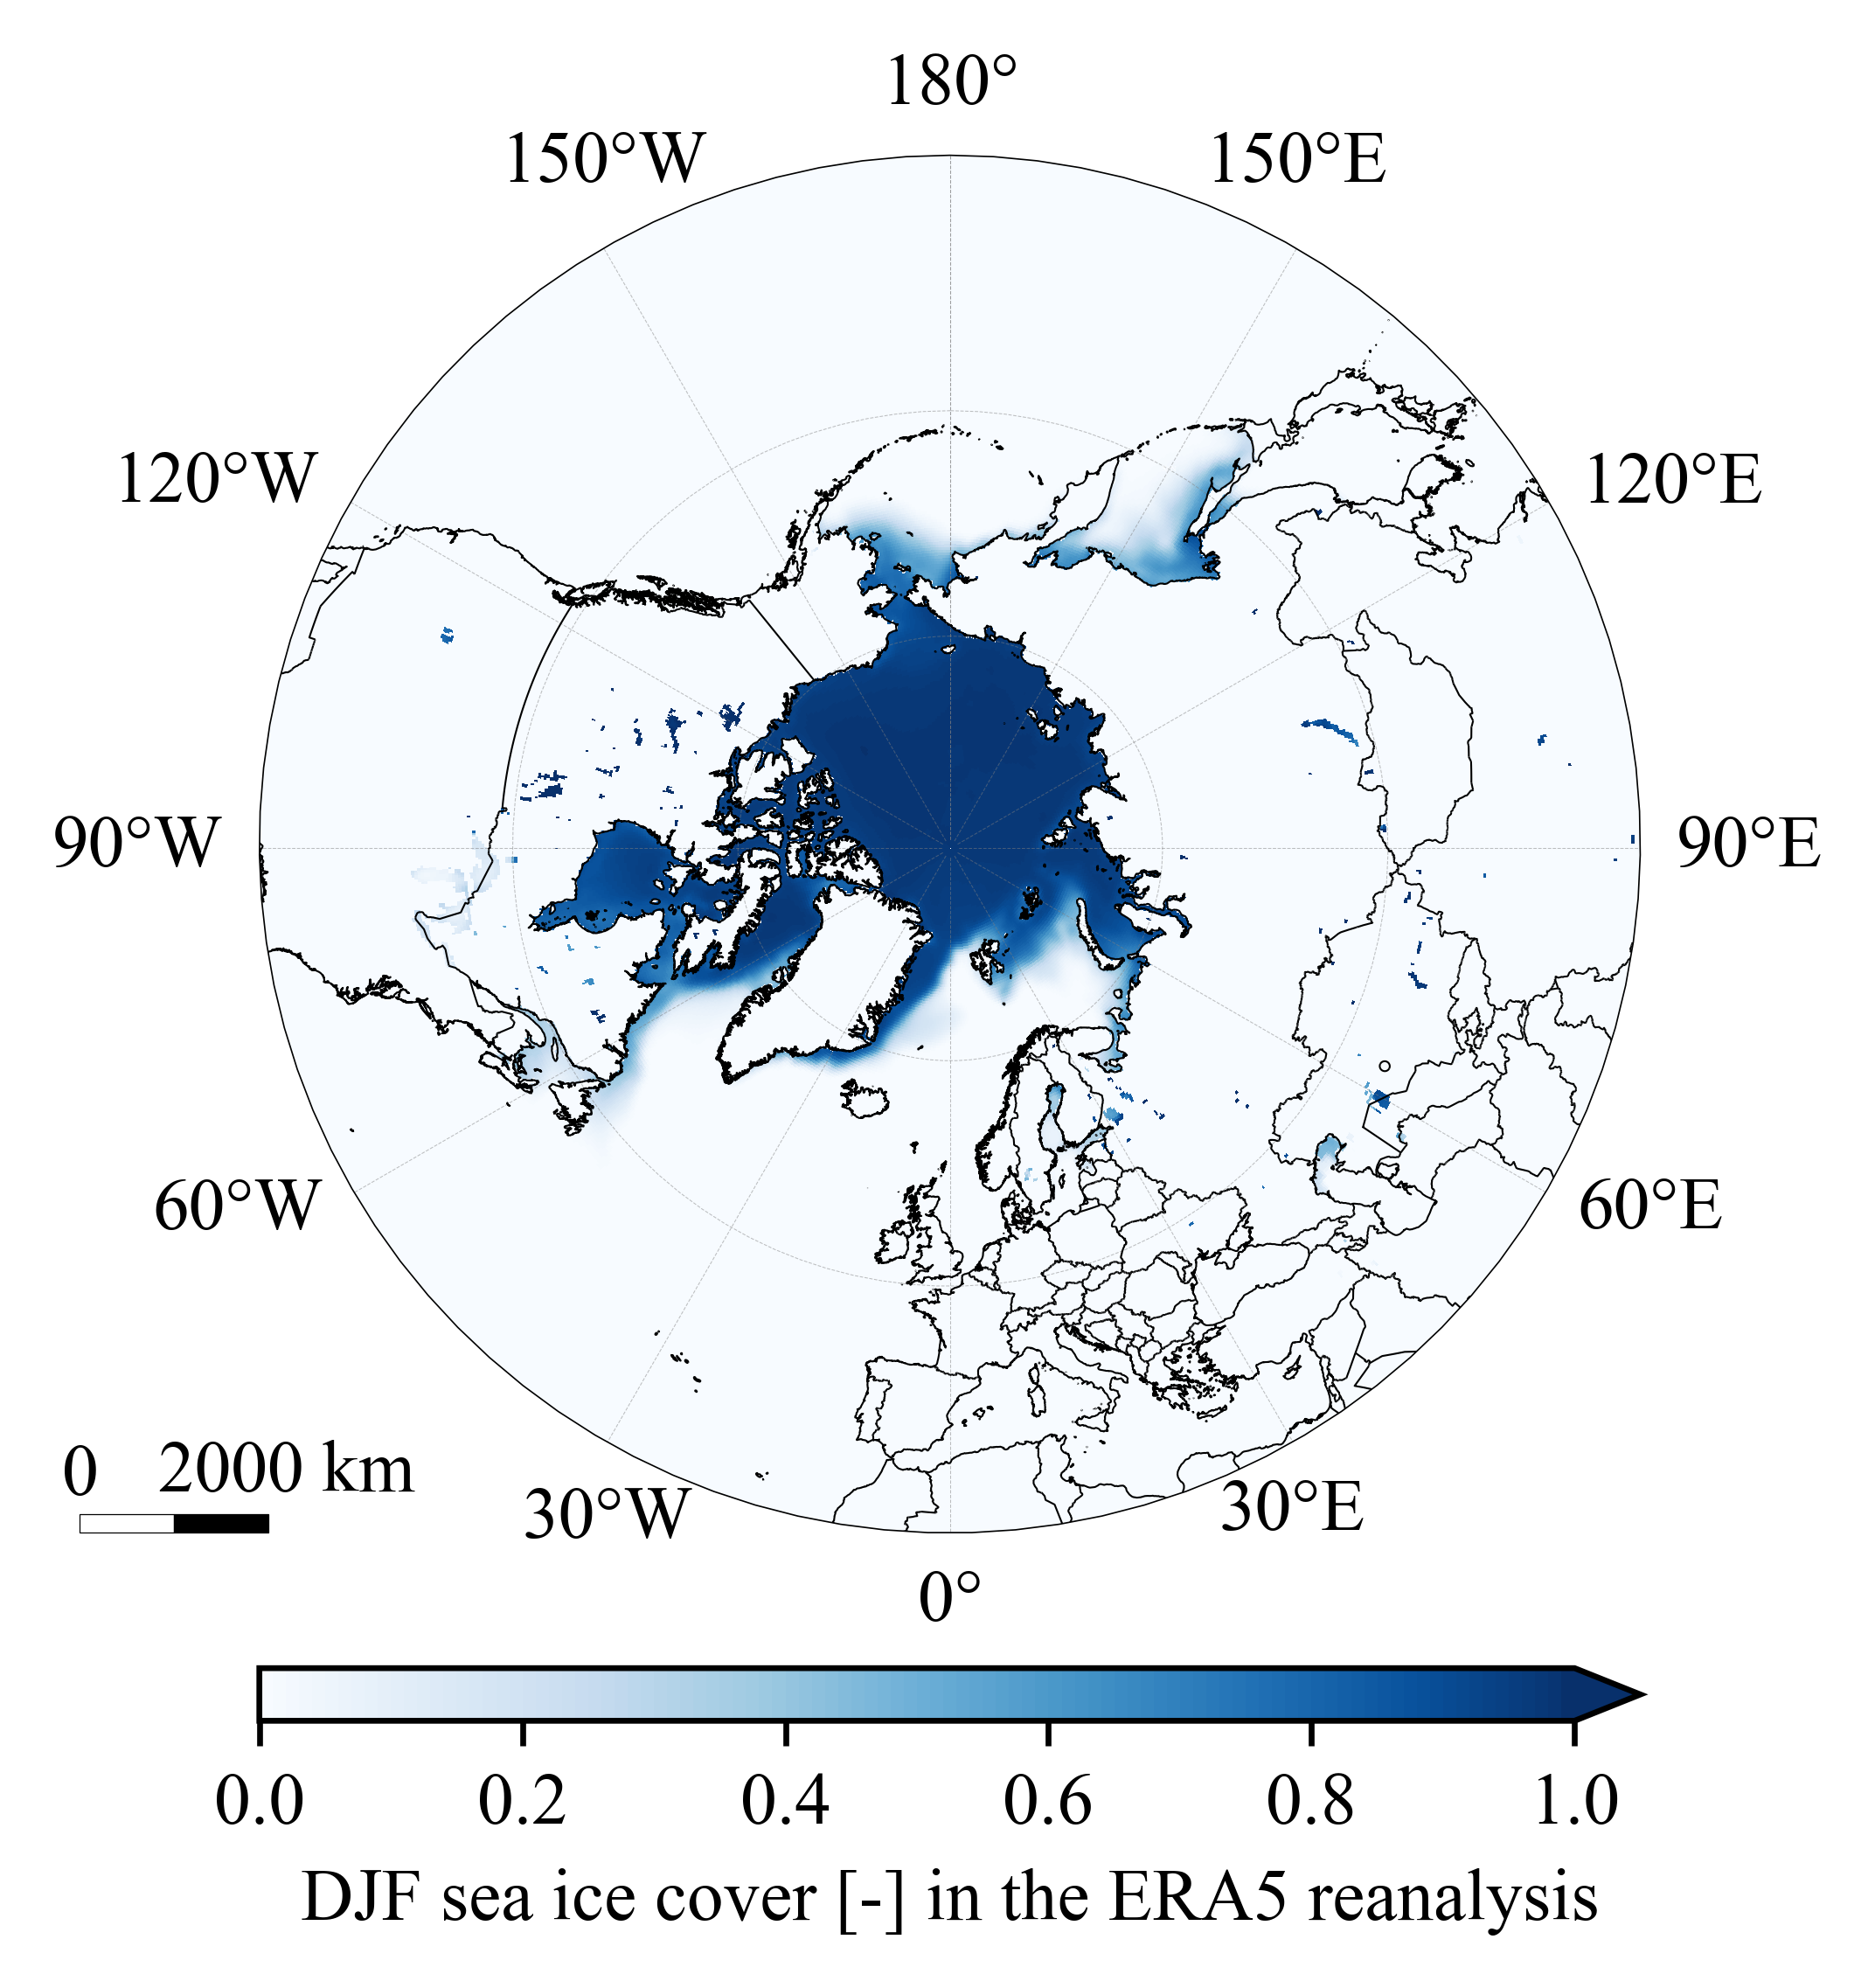

In [3]:
fig, ax = hemisphere_plot(southextent=30, sb_length=2000, sb_barheight=200,)

pltlevel = np.arange(0, 1.01, 0.01)
pltticks = np.arange(0, 1.01, 0.2)

plt_cmp = ax.pcolormesh(
    lon, lat, siconc_weighted.sel(season='DJF'),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='max',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("DJF sea ice cover [-] in the ERA5 reanalysis")

plt.show()

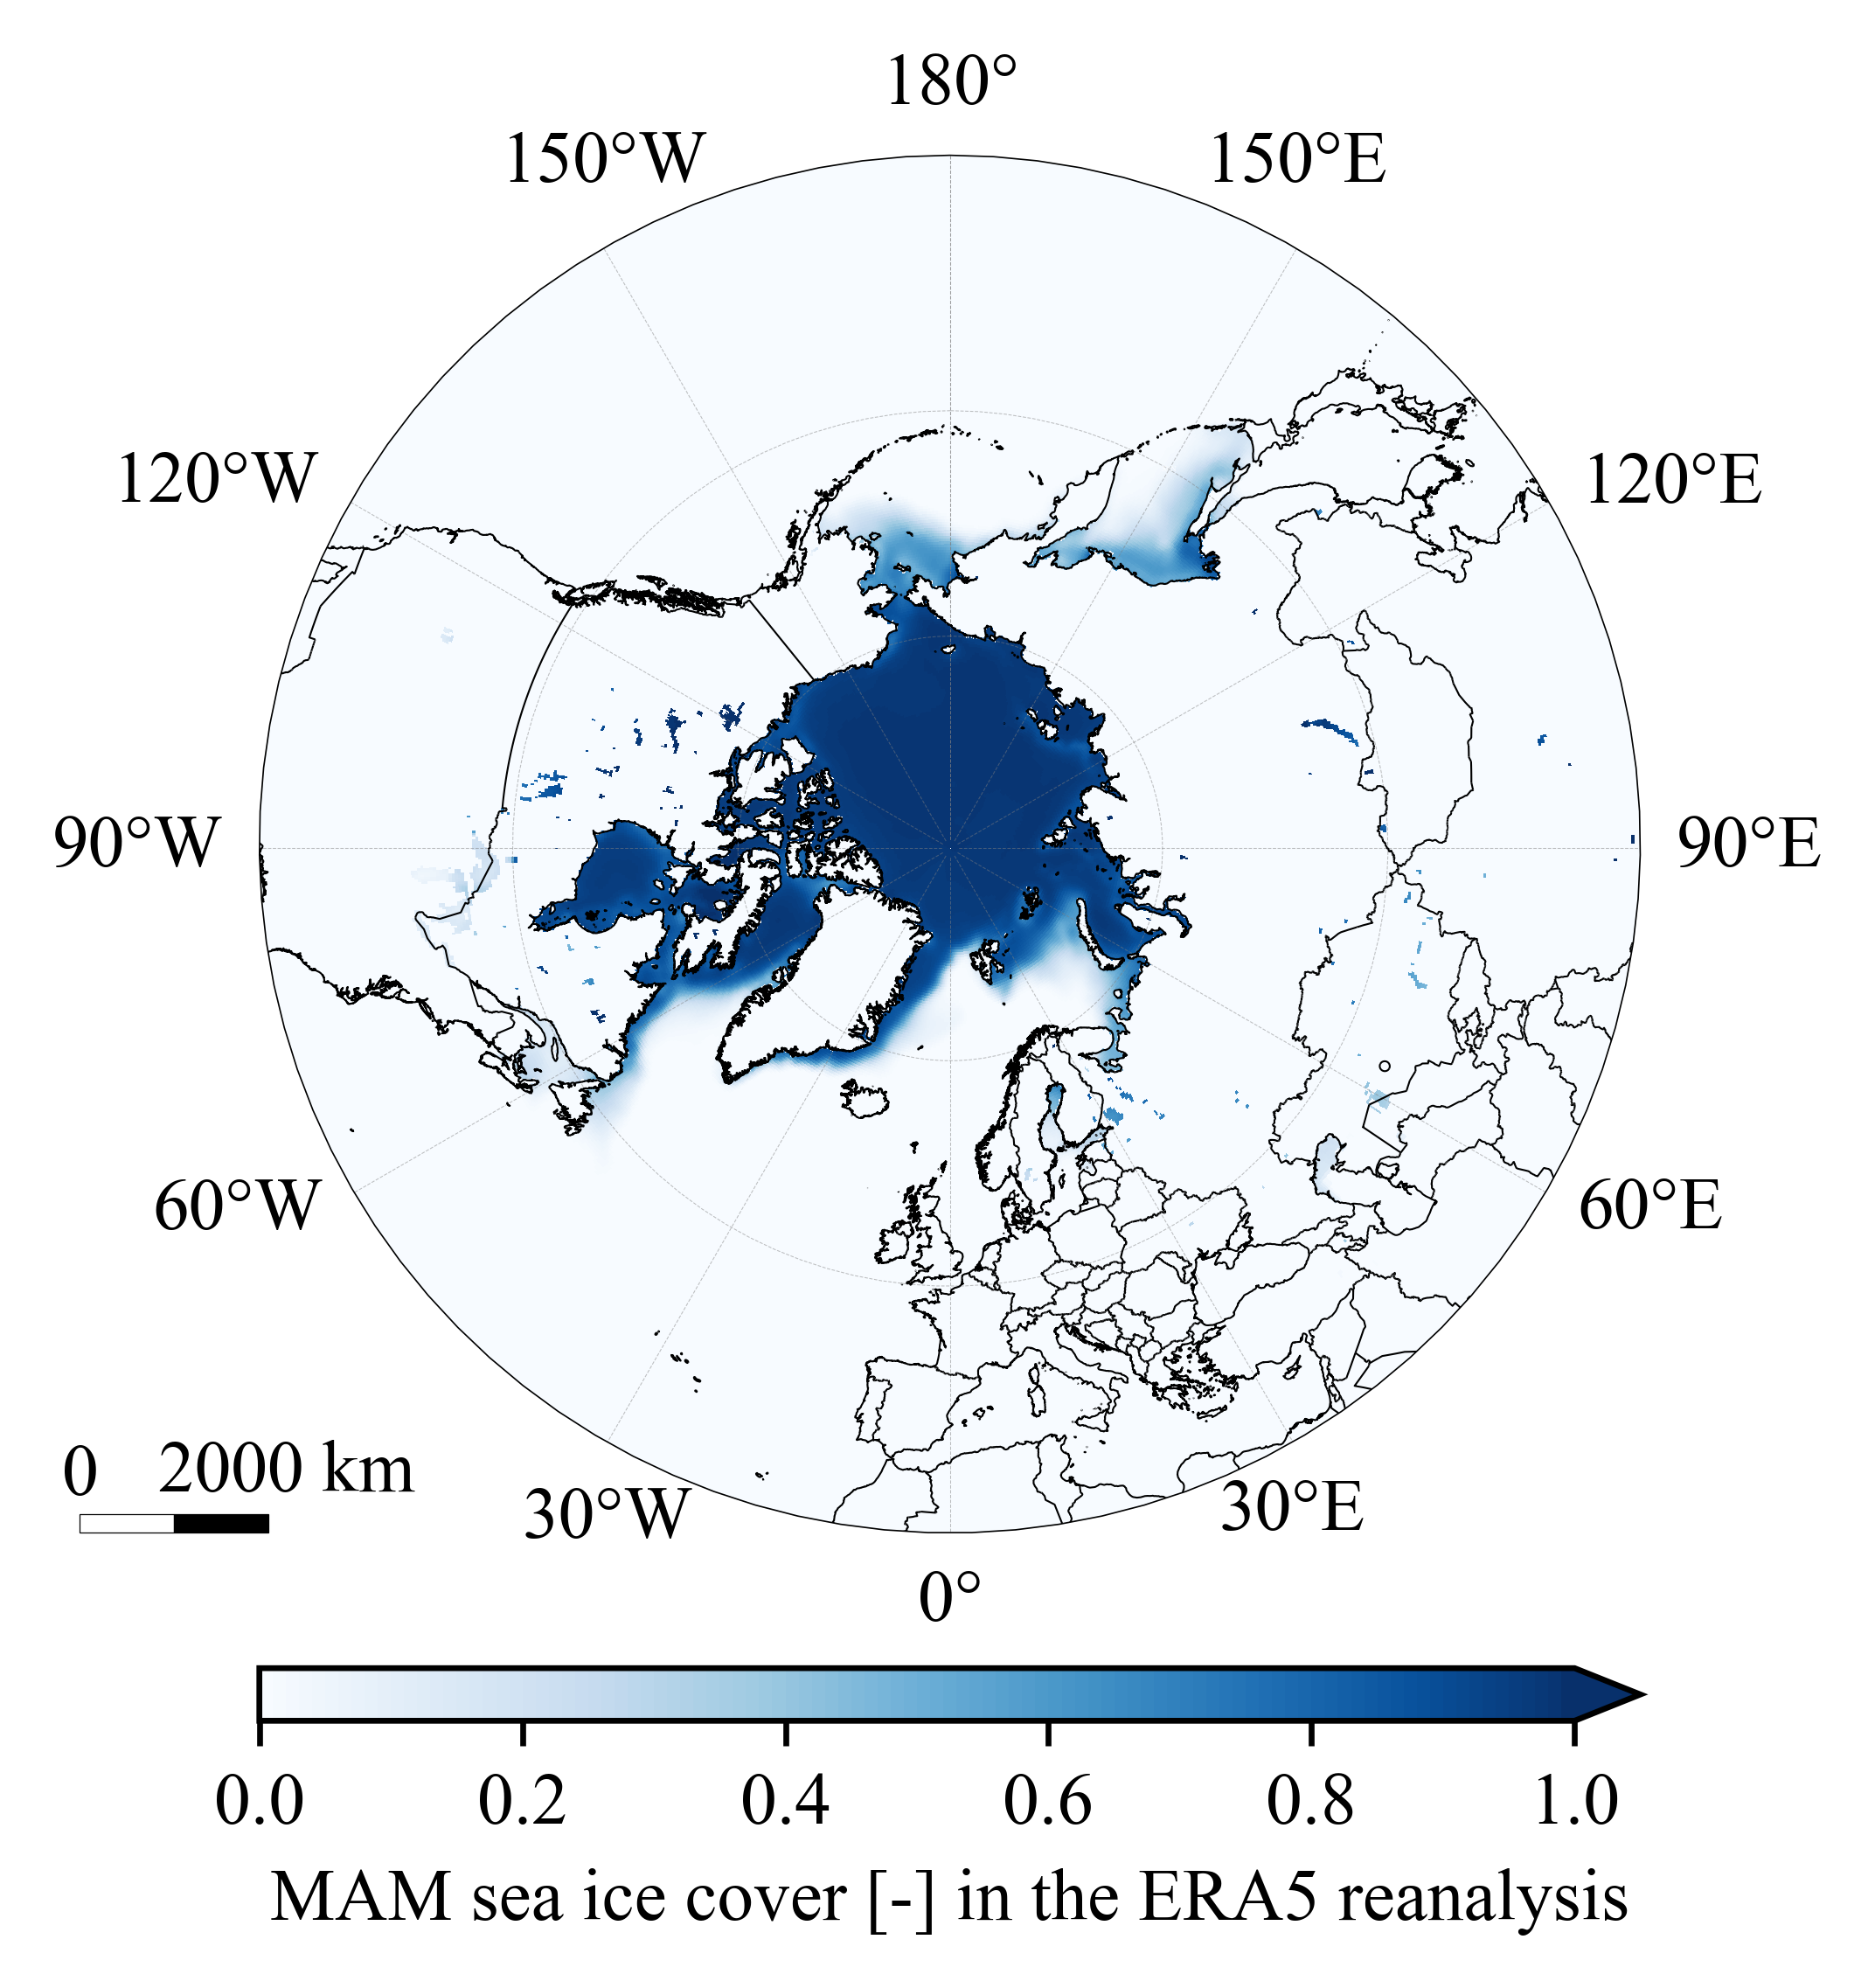

In [4]:
fig, ax = hemisphere_plot(southextent=30, sb_length=2000, sb_barheight=200,)

pltlevel = np.arange(0, 1.01, 0.01)
pltticks = np.arange(0, 1.01, 0.2)

plt_cmp = ax.pcolormesh(
    lon, lat, siconc_weighted.sel(season='MAM'),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='max',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("MAM sea ice cover [-] in the ERA5 reanalysis")

plt.show()

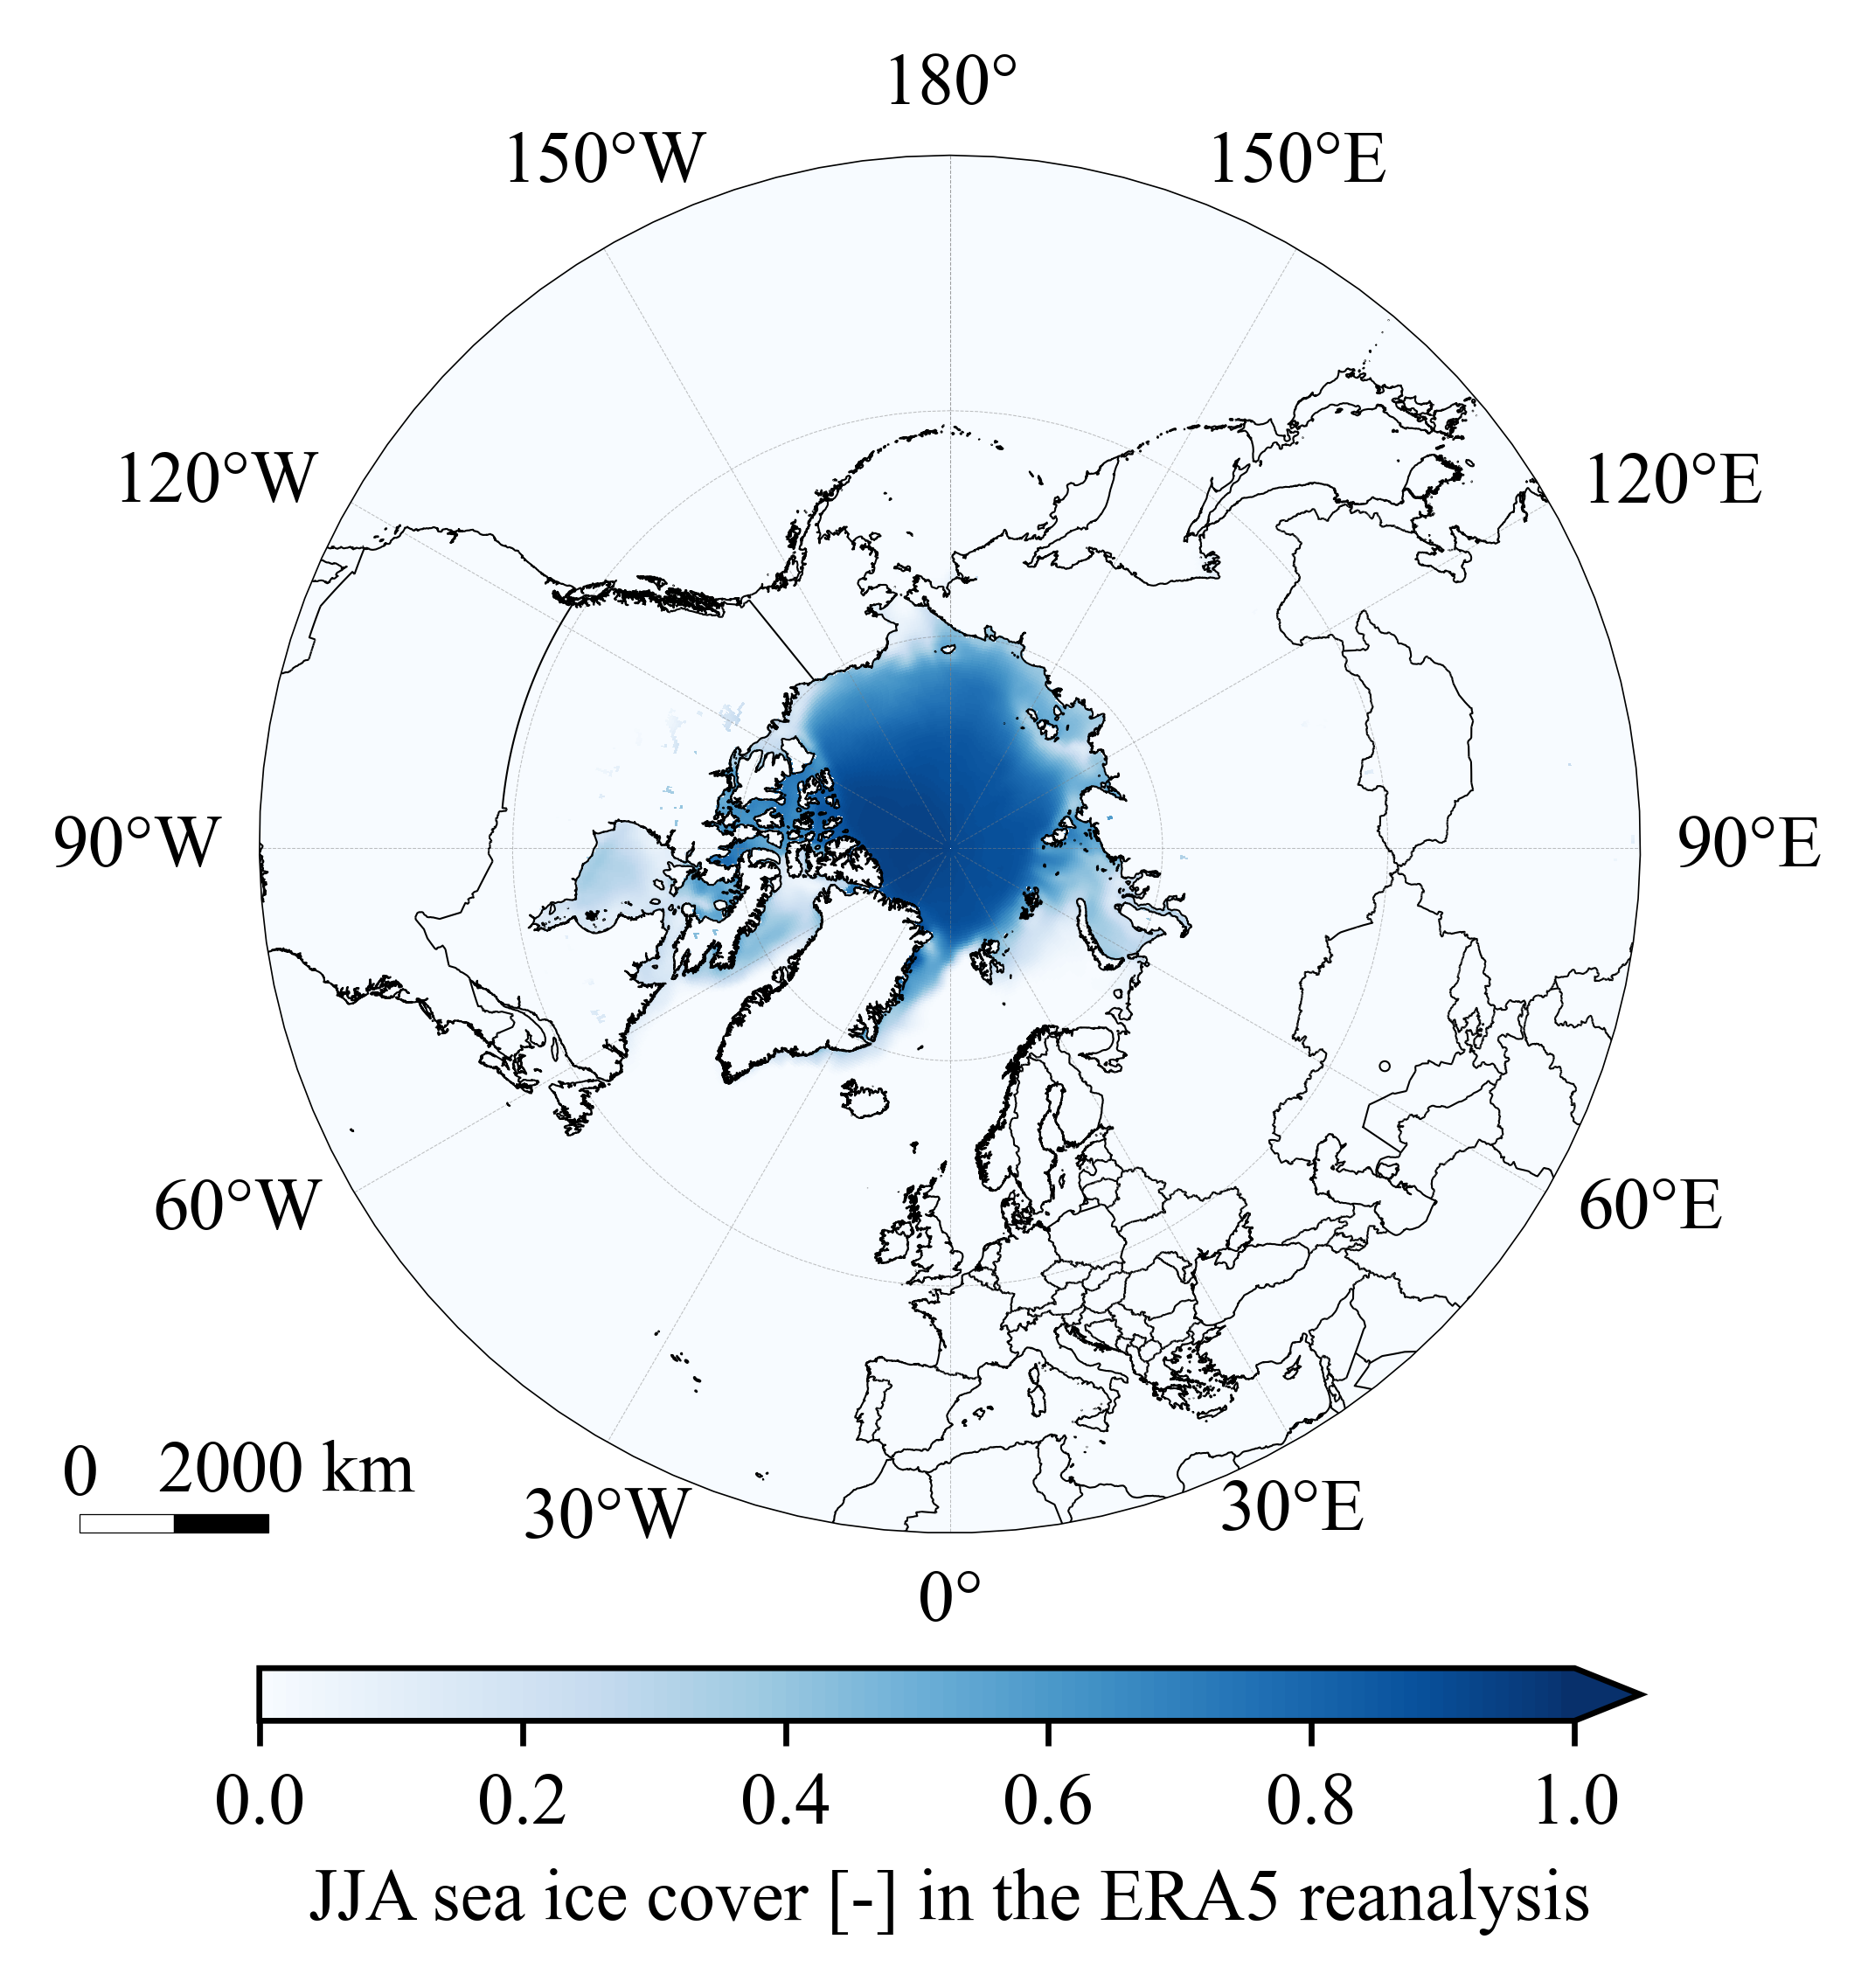

In [5]:
fig, ax = hemisphere_plot(southextent=30, sb_length=2000, sb_barheight=200,)

pltlevel = np.arange(0, 1.01, 0.01)
pltticks = np.arange(0, 1.01, 0.2)

plt_cmp = ax.pcolormesh(
    lon, lat, siconc_weighted.sel(season='JJA'),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='max',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("JJA sea ice cover [-] in the ERA5 reanalysis")

plt.show()

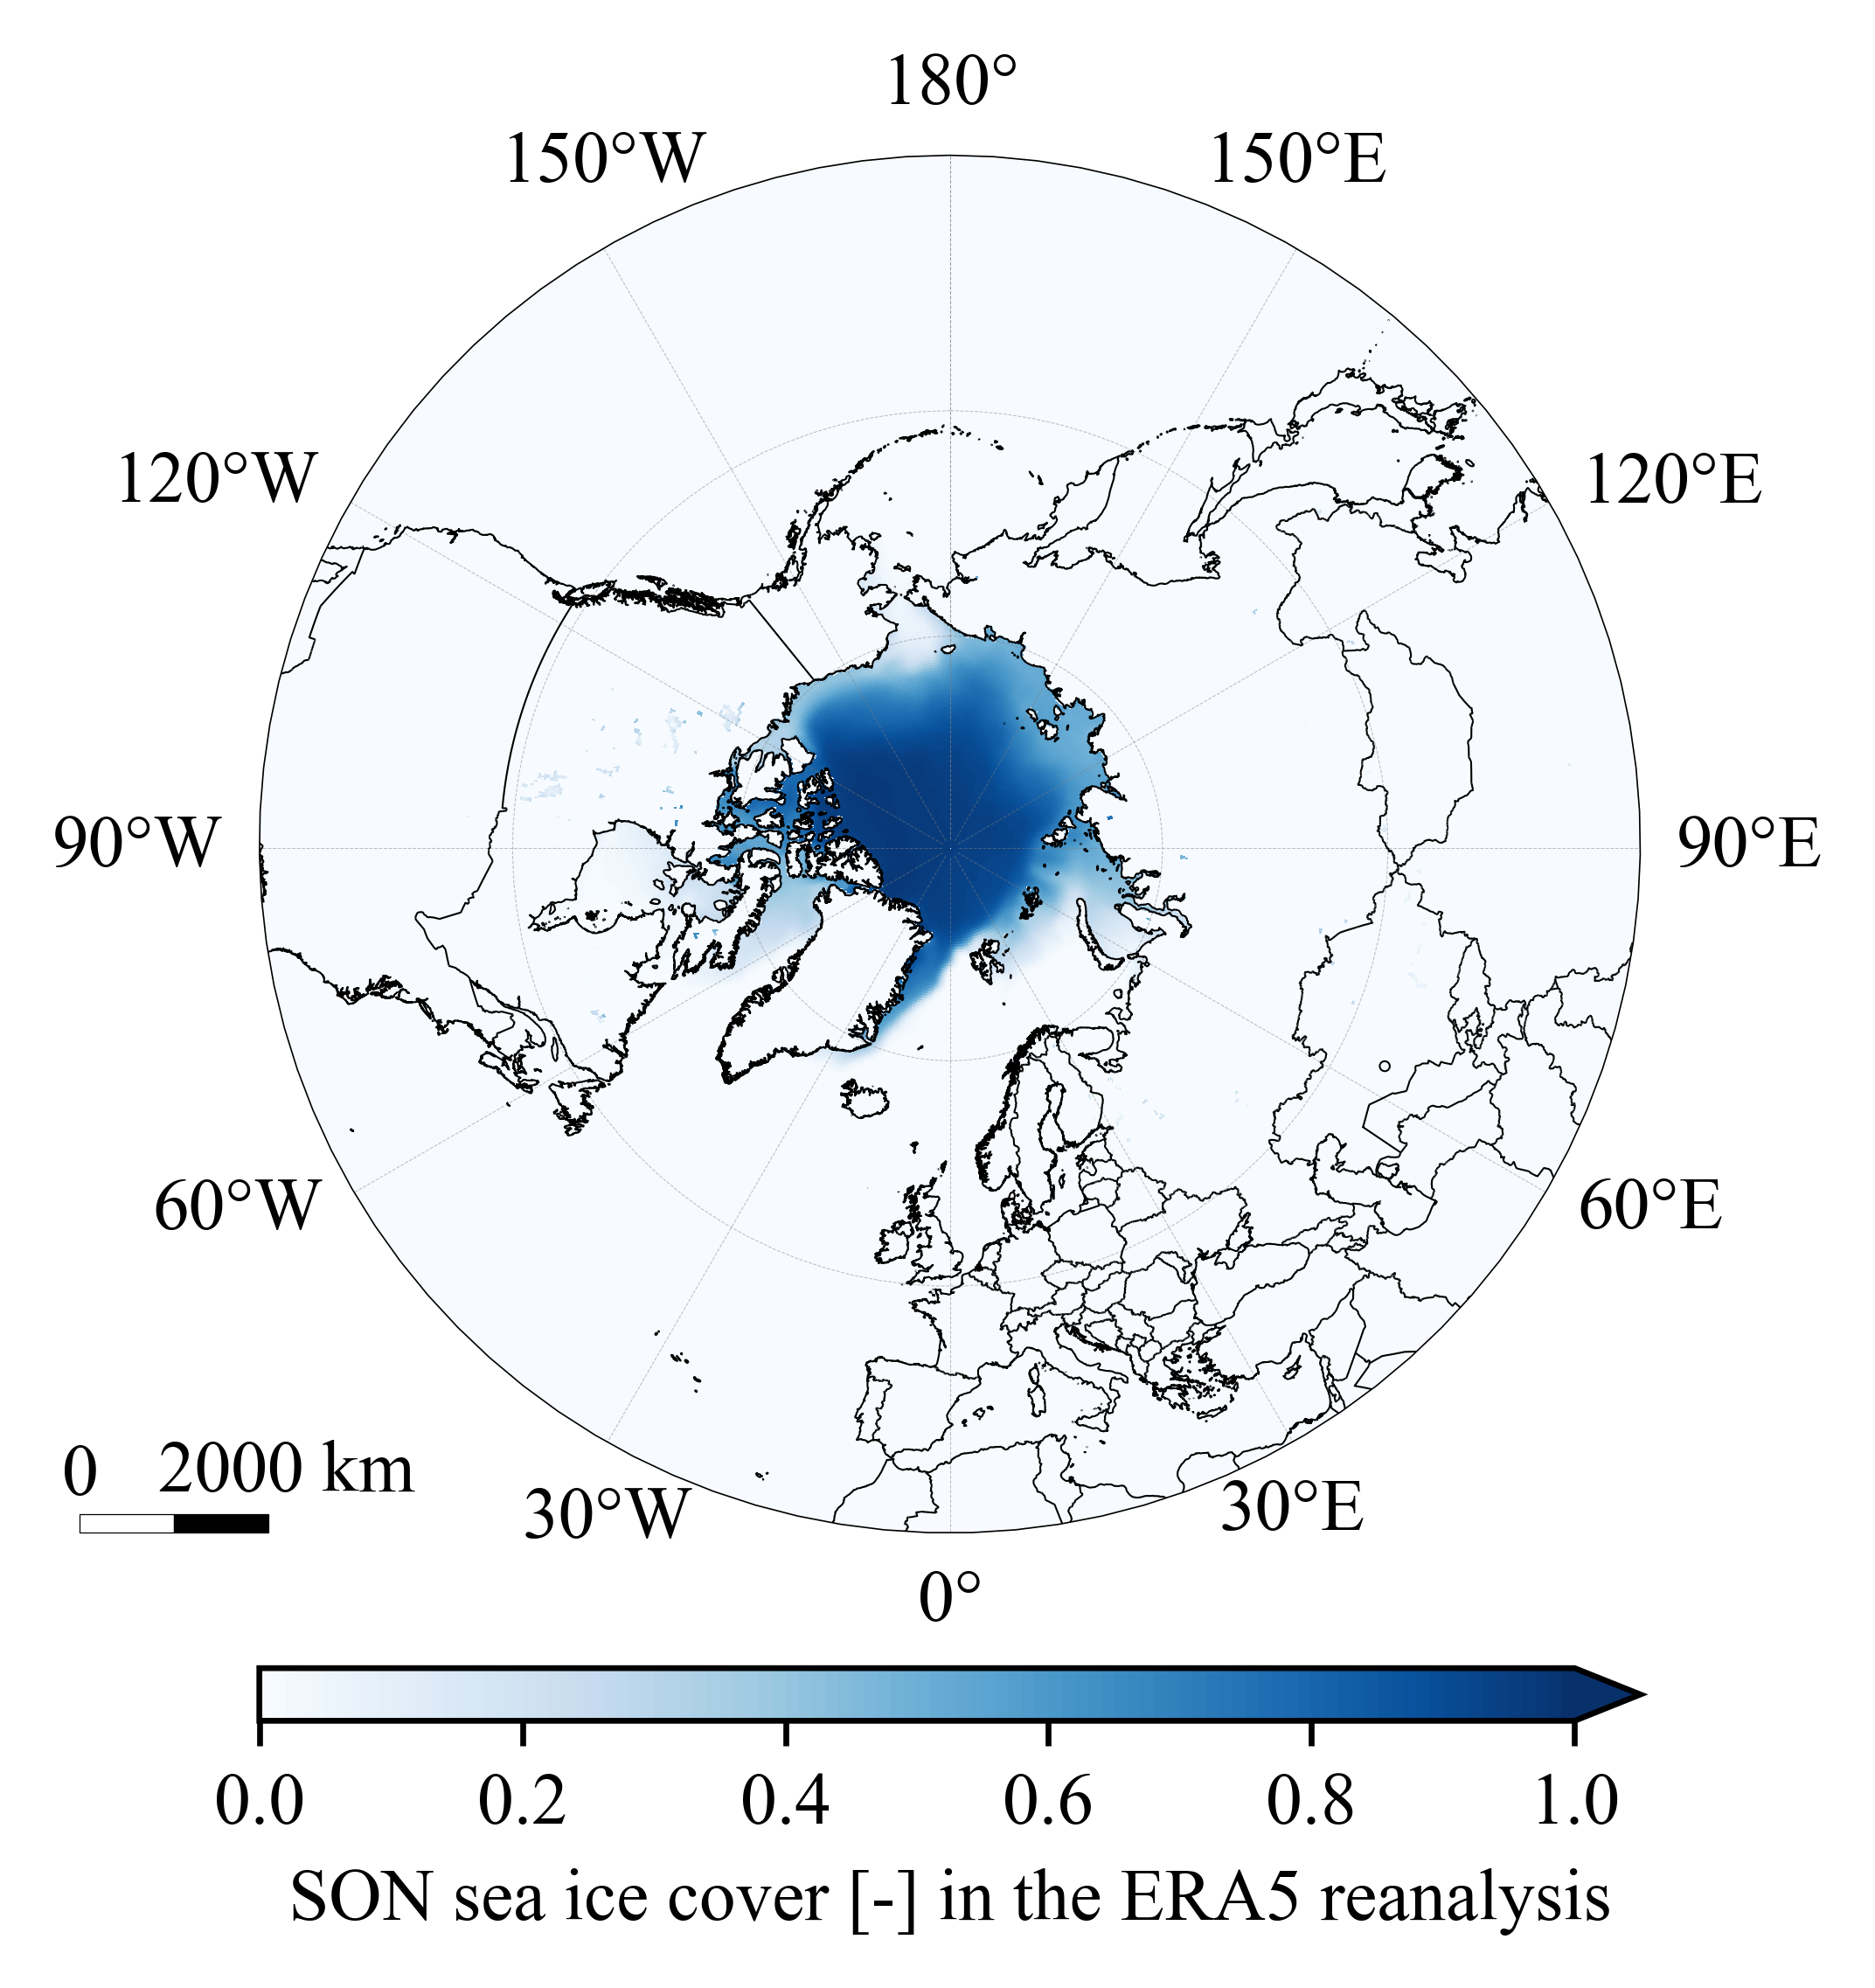

In [6]:
fig, ax = hemisphere_plot(southextent=30, sb_length=2000, sb_barheight=200,)

pltlevel = np.arange(0, 1.01, 0.01)
pltticks = np.arange(0, 1.01, 0.2)

plt_cmp = ax.pcolormesh(
    lon, lat, siconc_weighted.sel(season='SON'),
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='max',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("SON sea ice cover [-] in the ERA5 reanalysis")

plt.show()


Southern Hemisphere

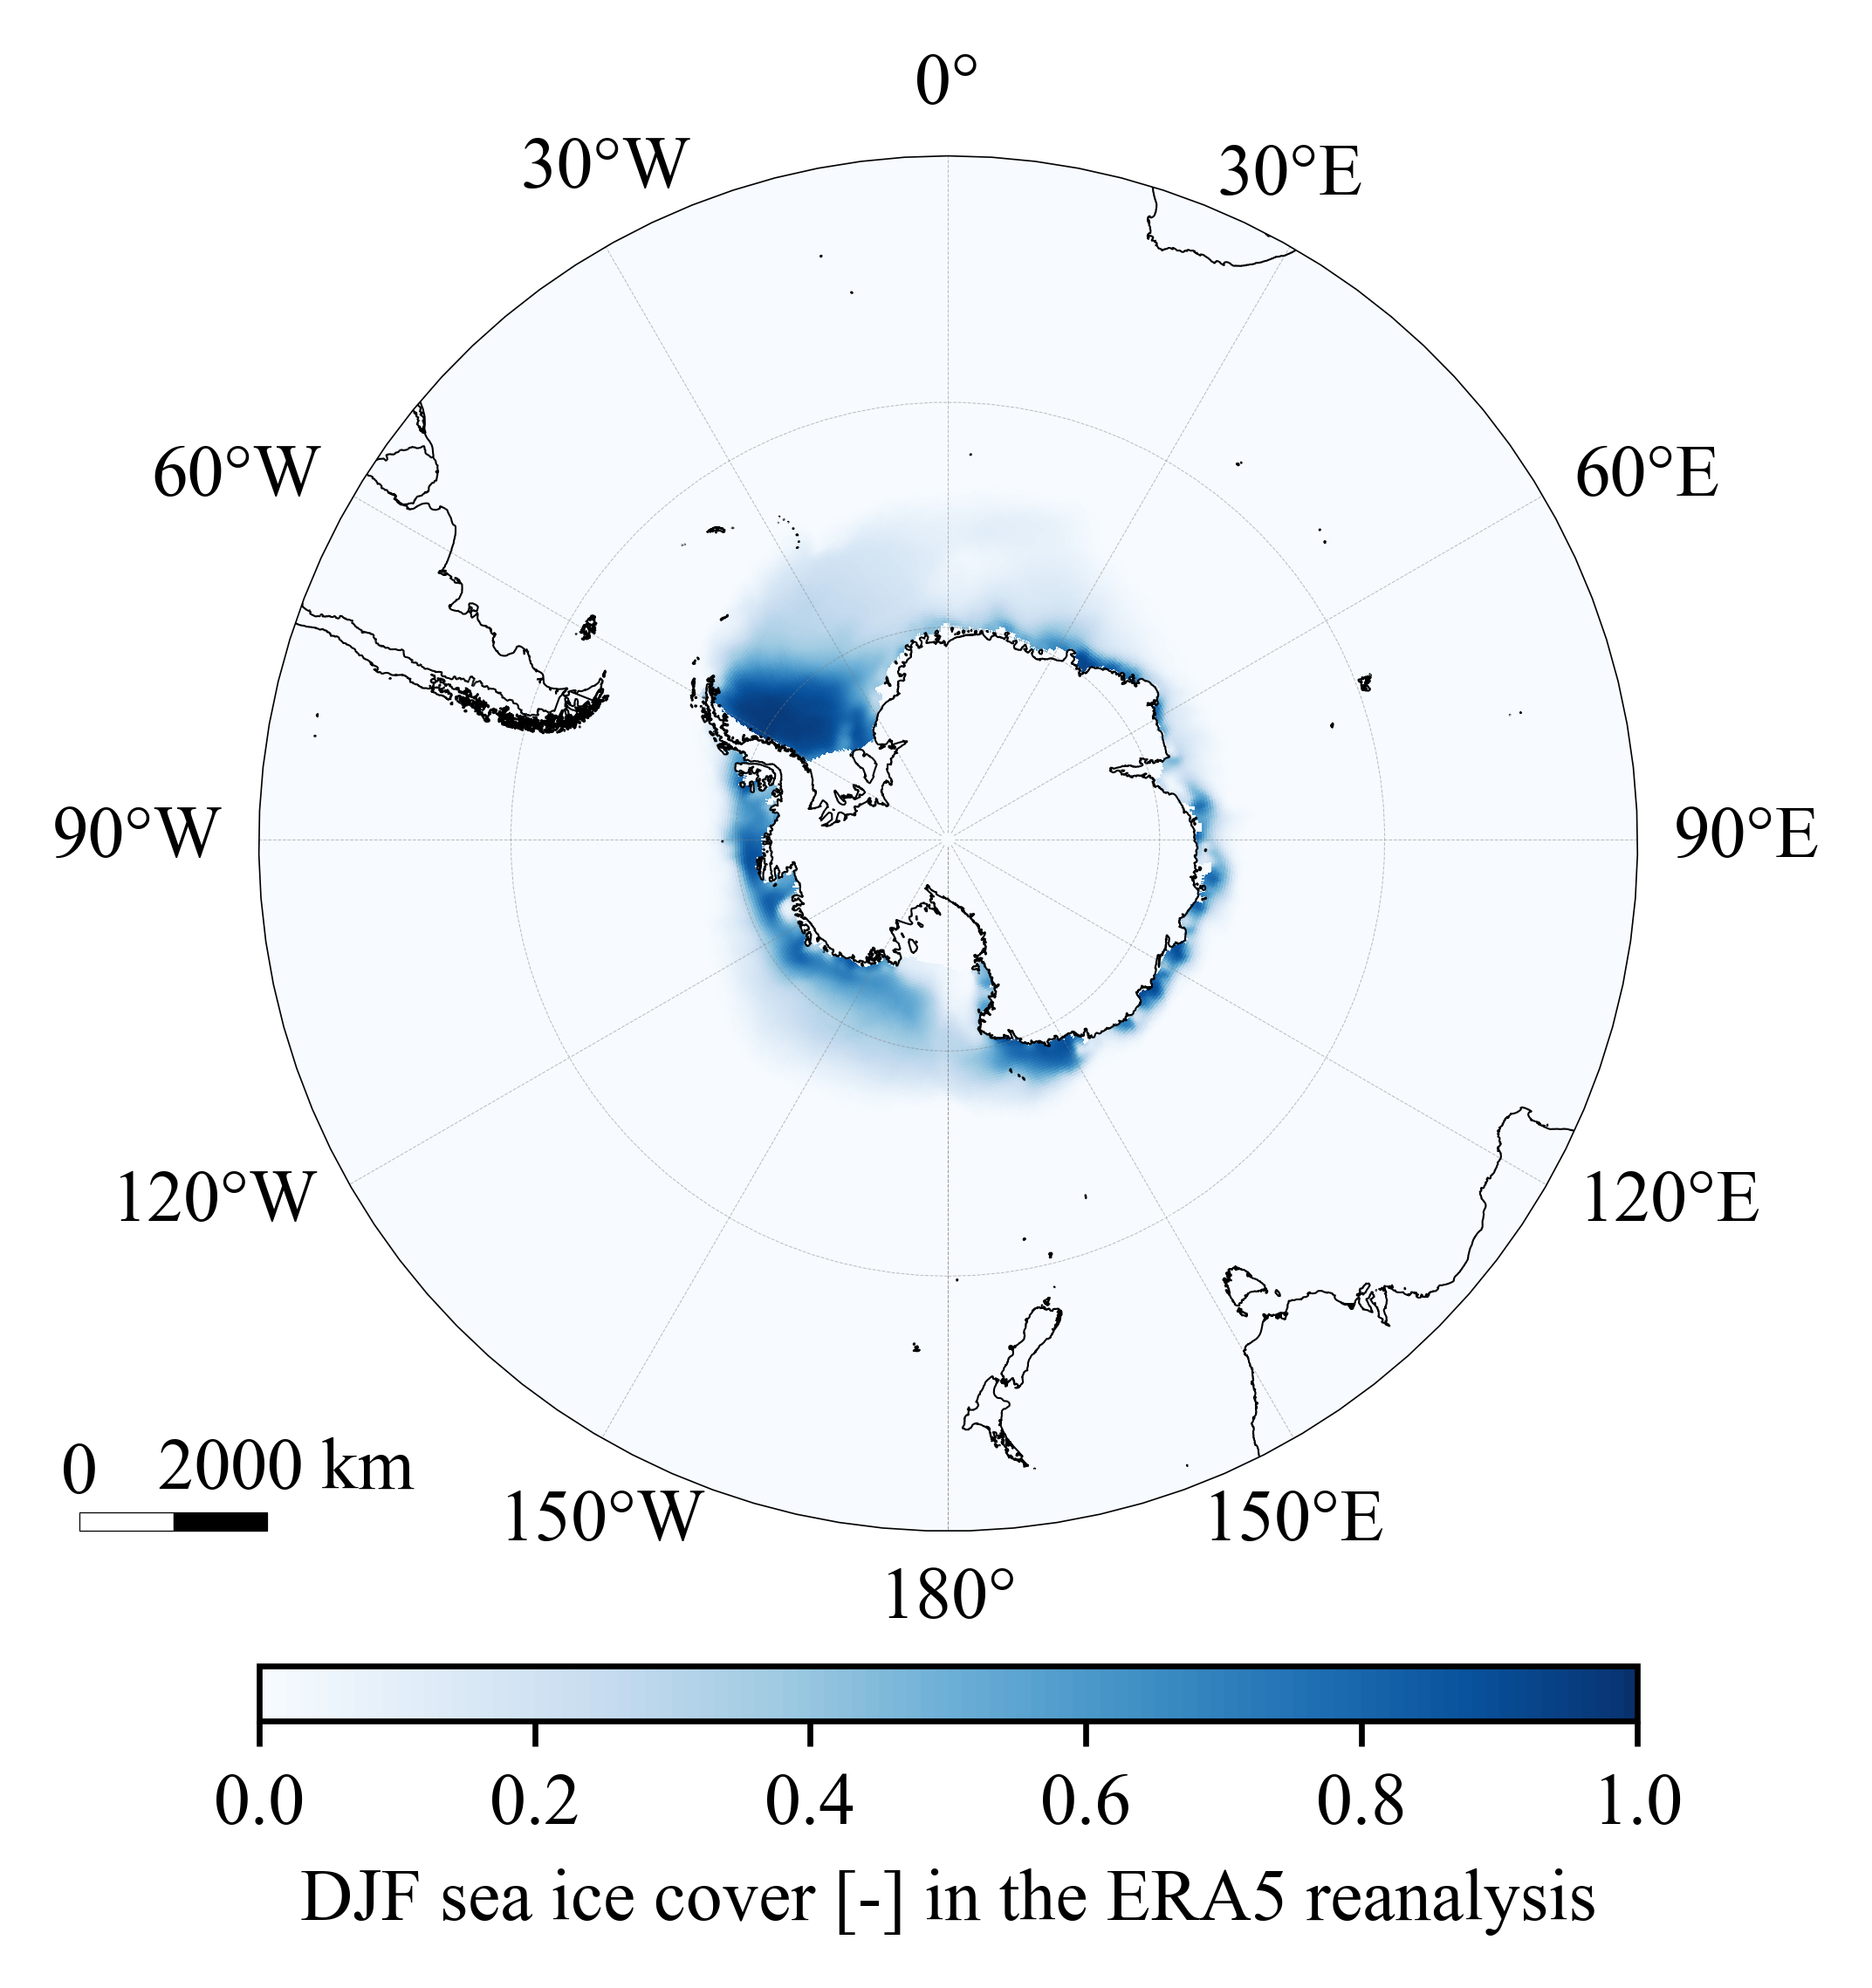

In [8]:
pltlevel = np.arange(0, 1.01, 0.01)
pltticks = np.arange(0, 1.01, 0.2)

fig, ax = hemisphere_plot(northextent=-30, sb_length=2000, sb_barheight=200,)

plt_cmp = ax.pcolormesh(
    lon, lat[480:], siconc_weighted.sel(season='DJF')[480:, ],
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='neither',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("DJF sea ice cover [-] in the ERA5 reanalysis")
plt.show()

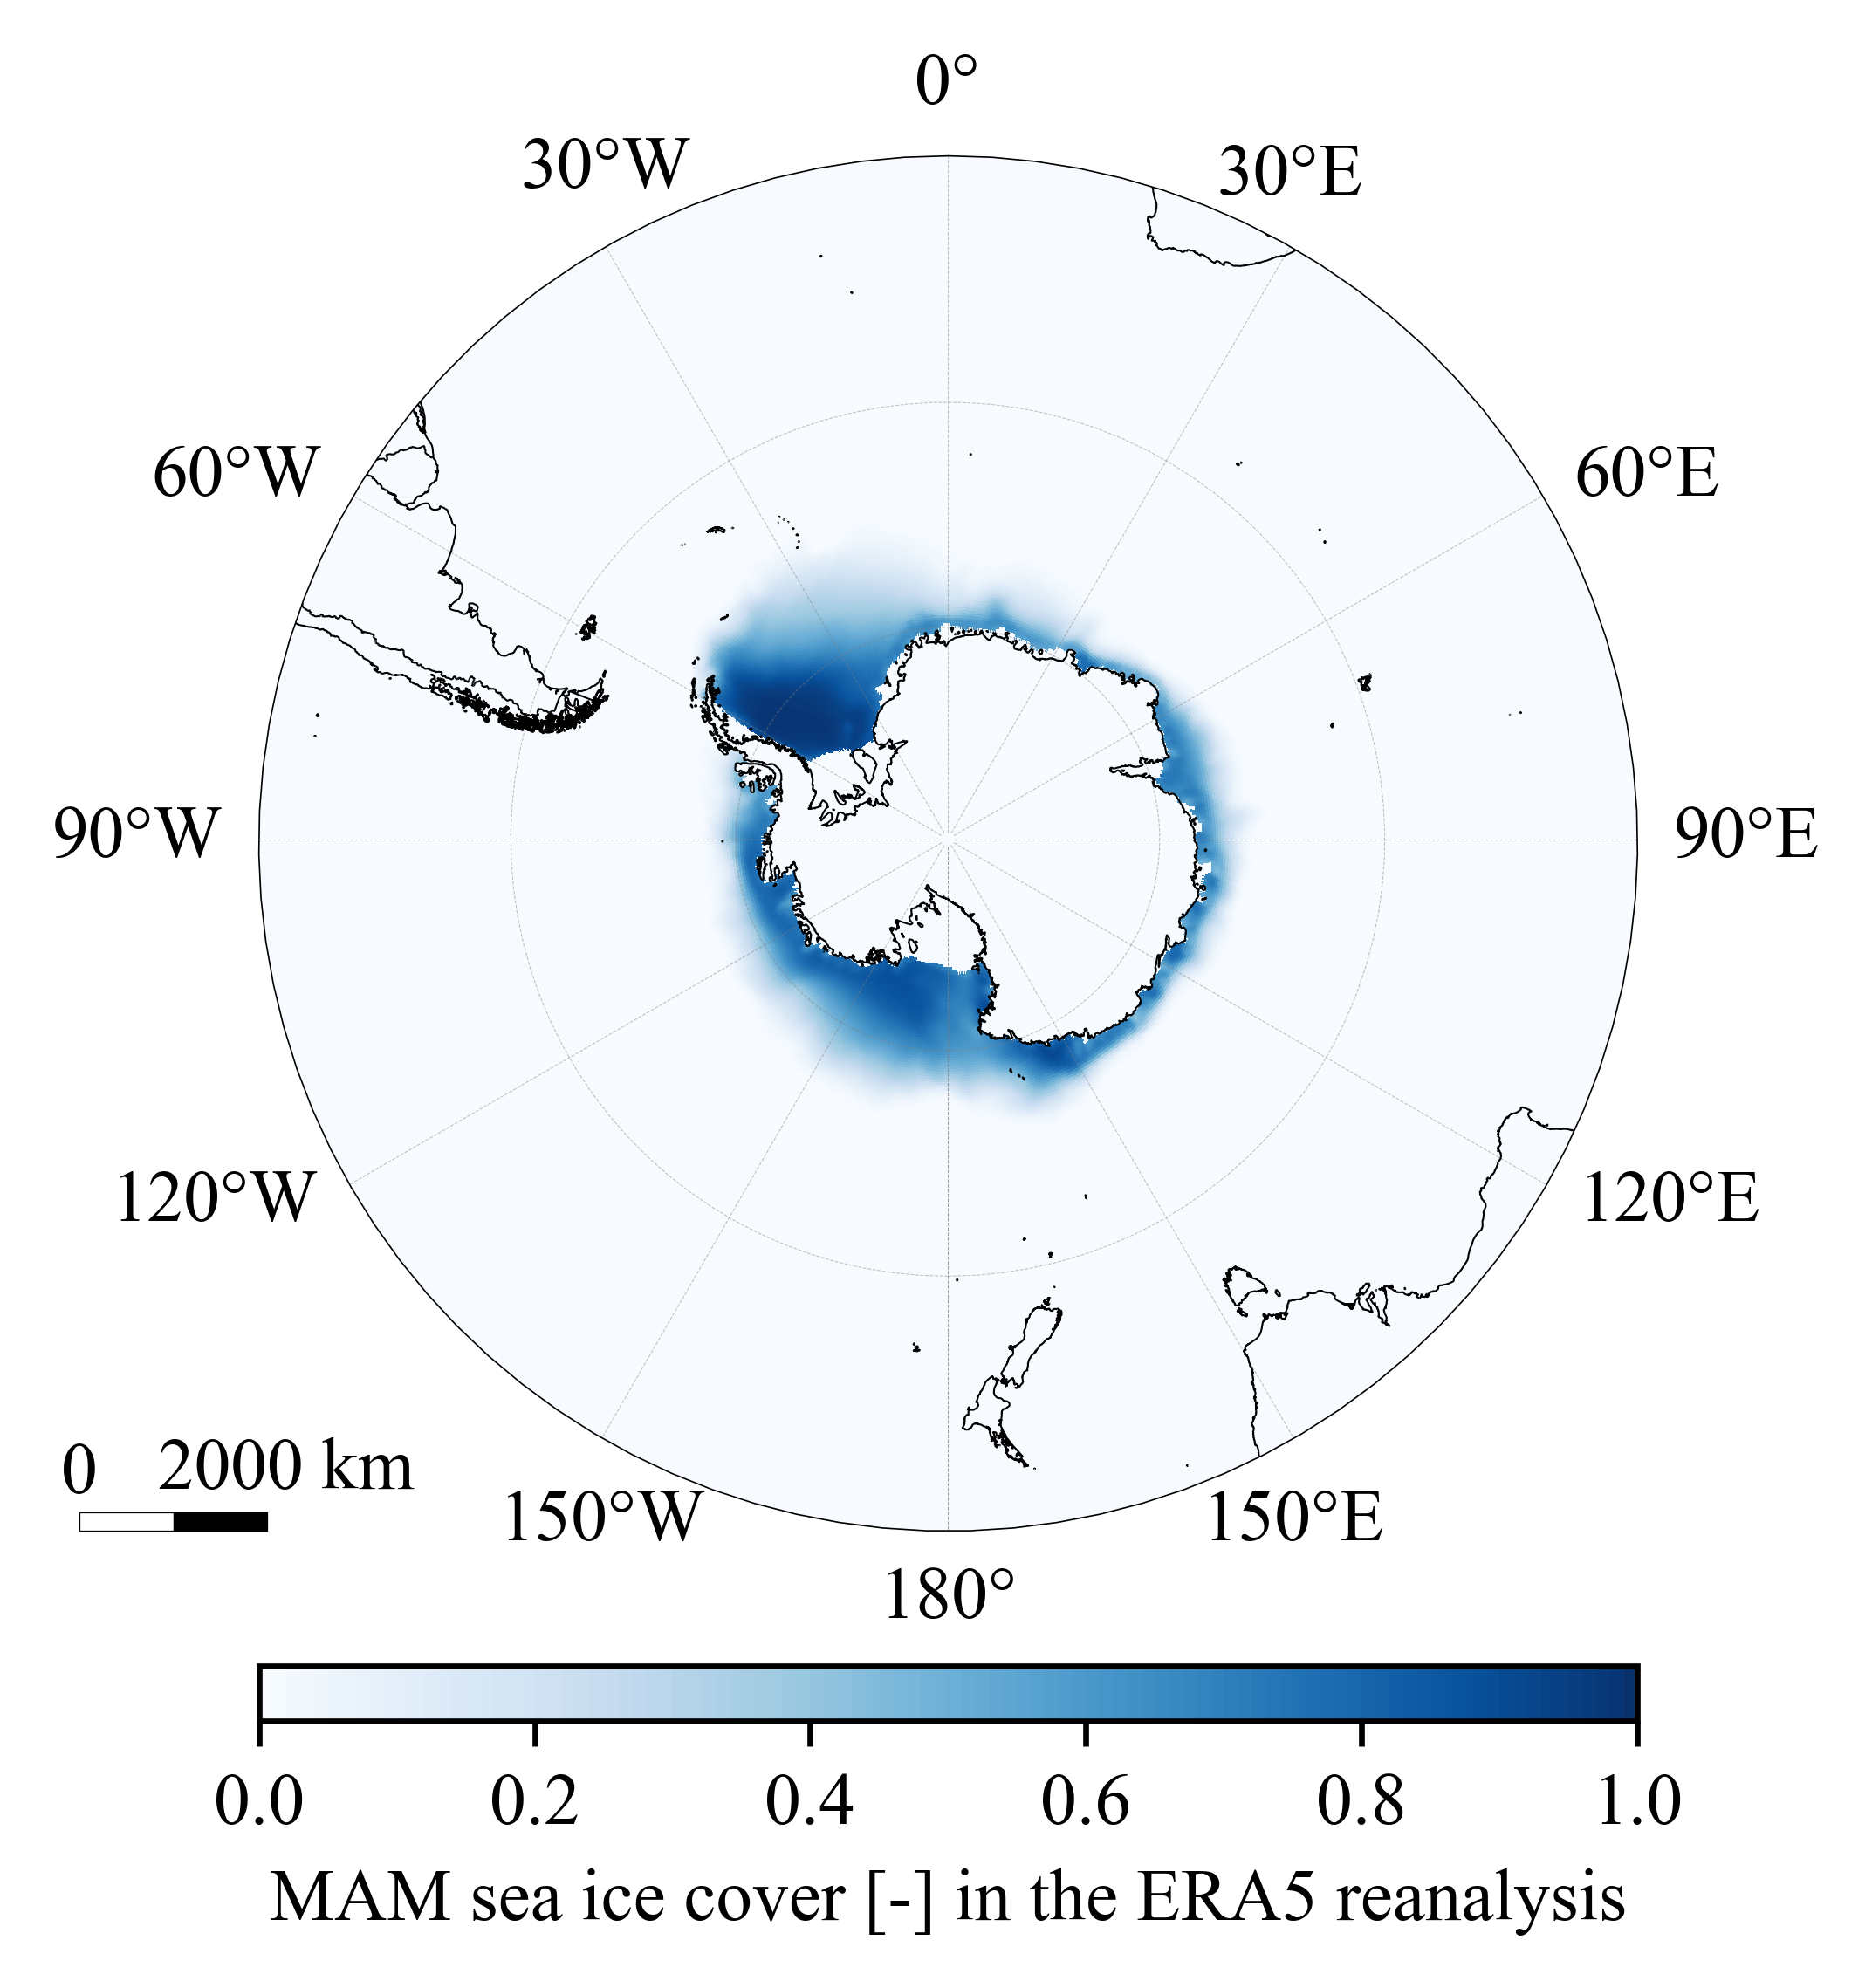

In [9]:
fig, ax = hemisphere_plot(northextent=-30, sb_length=2000, sb_barheight=200,)

plt_cmp = ax.pcolormesh(
    lon, lat[480:], siconc_weighted.sel(season='MAM')[480:, ],
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='neither',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("MAM sea ice cover [-] in the ERA5 reanalysis")
plt.show()


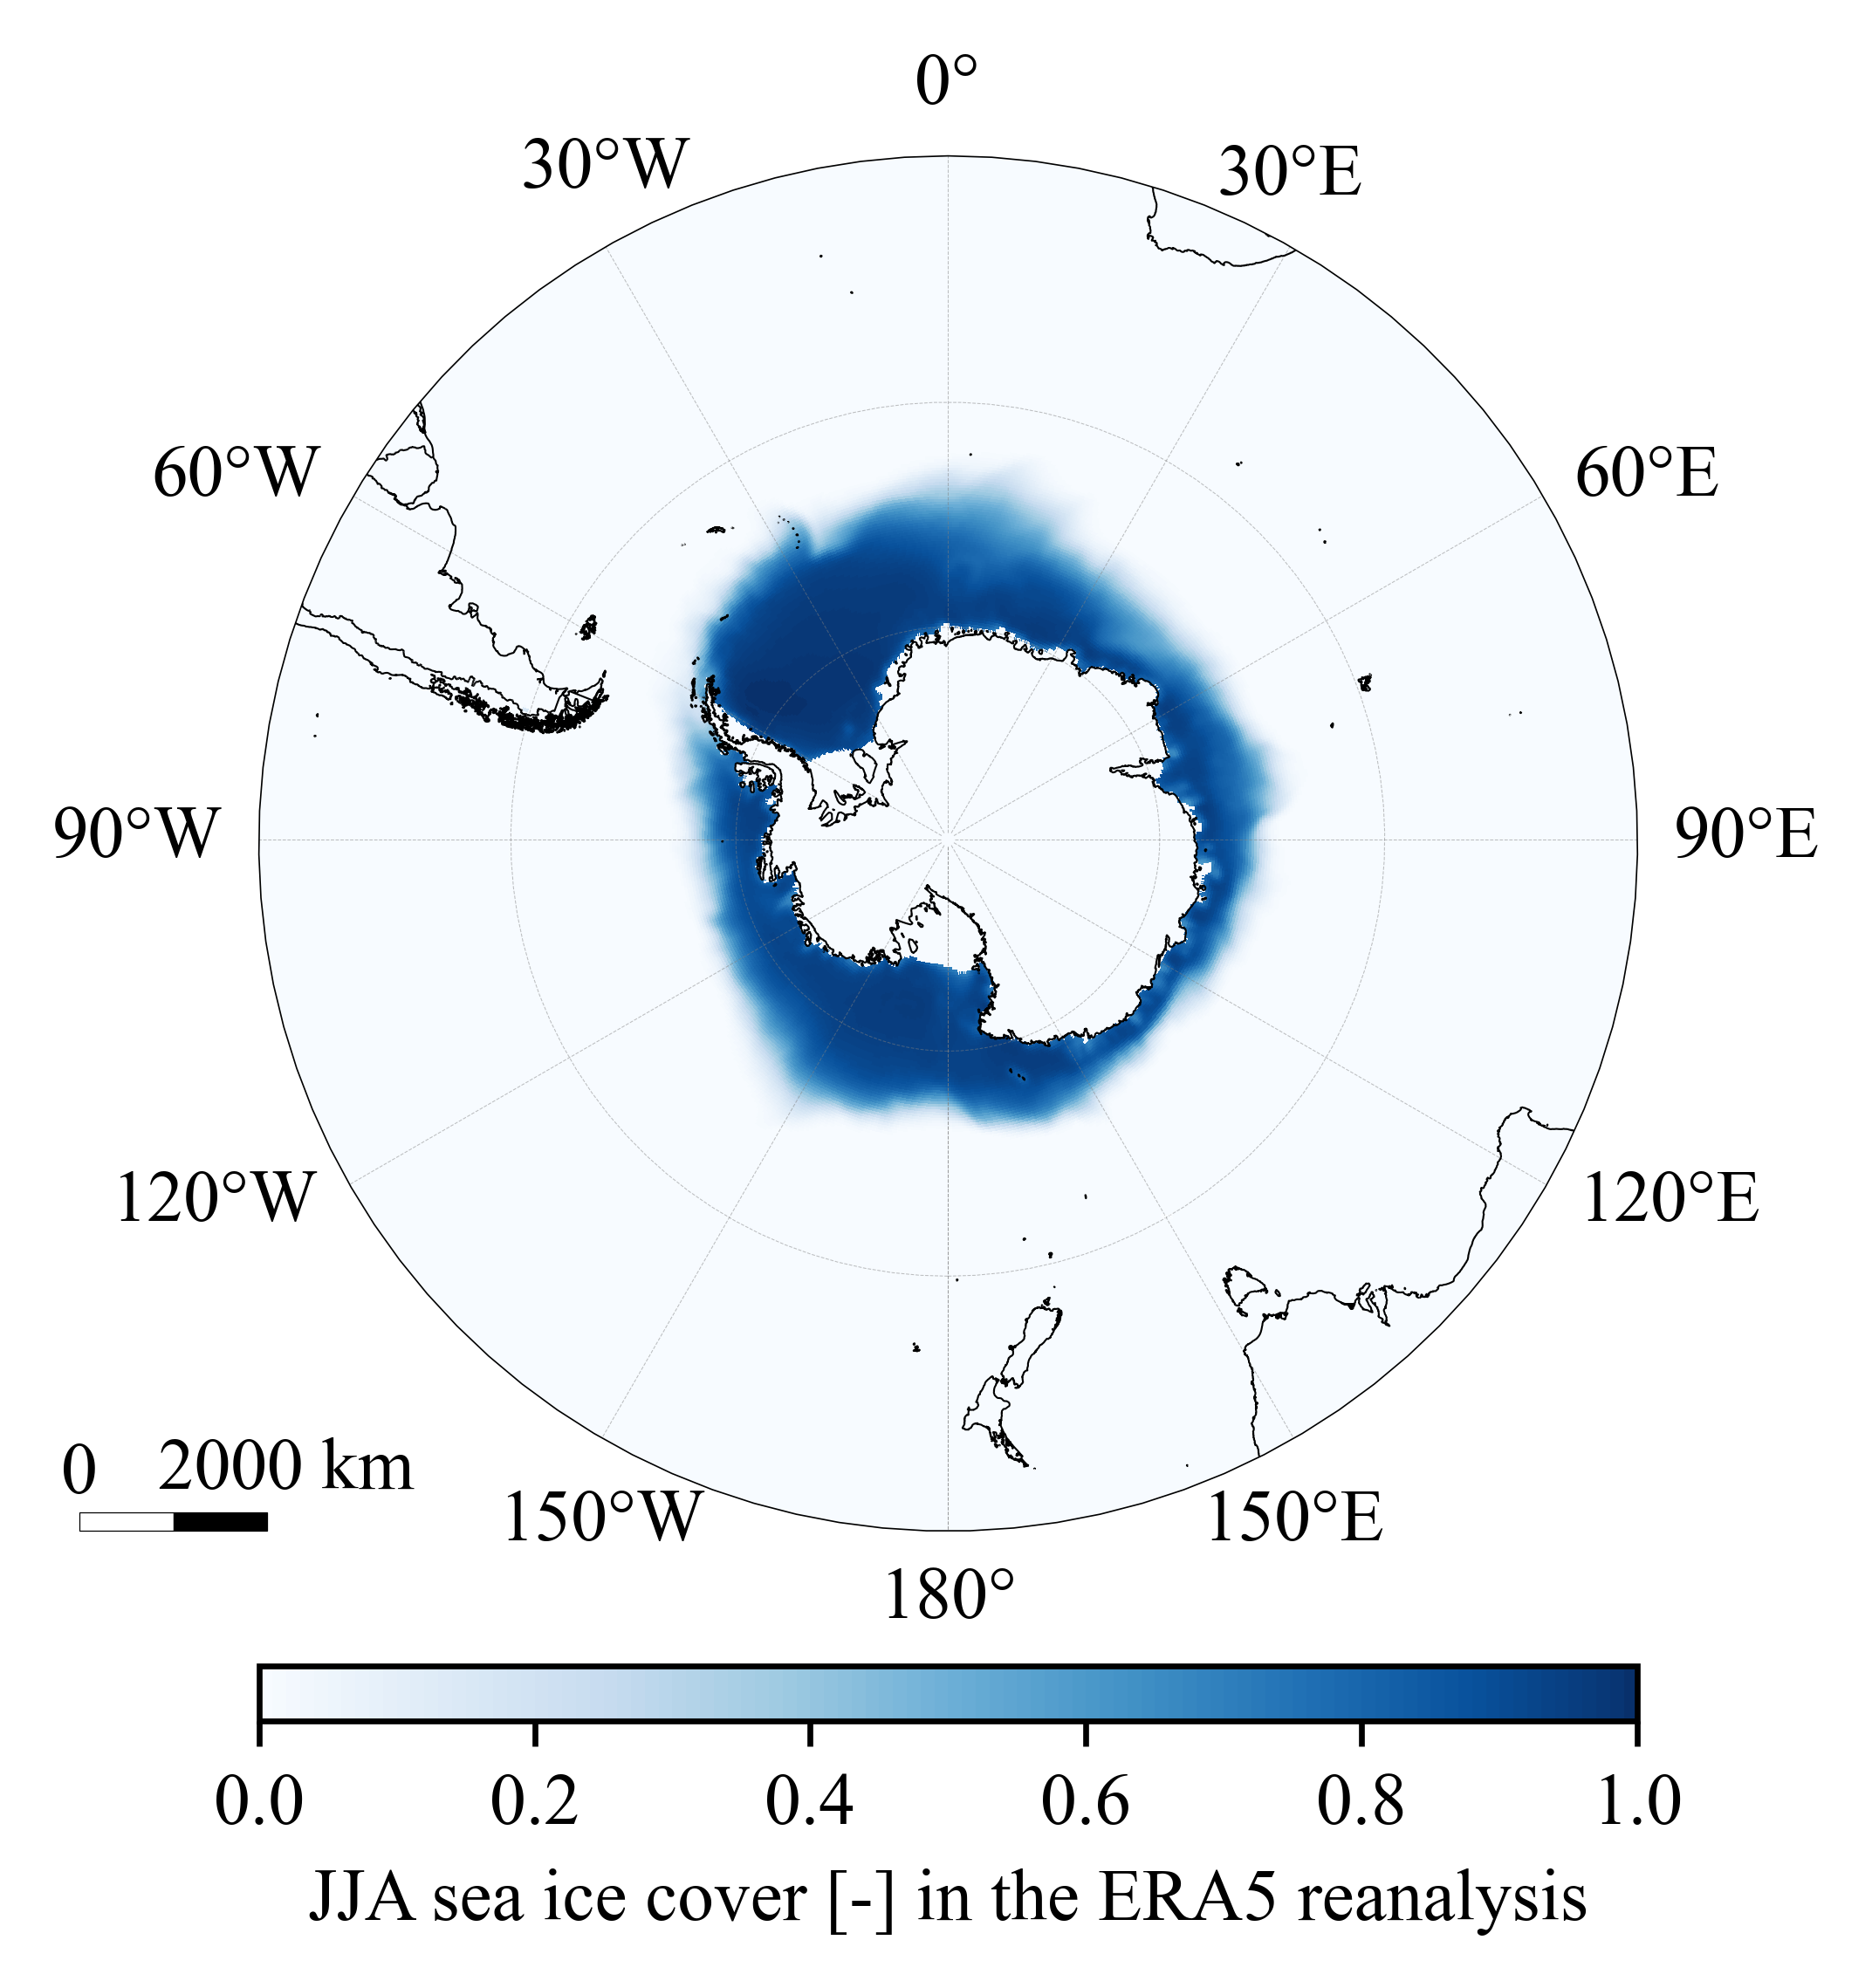

In [10]:
fig, ax = hemisphere_plot(northextent=-30, sb_length=2000, sb_barheight=200,)

plt_cmp = ax.pcolormesh(
    lon, lat[480:], siconc_weighted.sel(season='JJA')[480:, ],
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='neither',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("JJA sea ice cover [-] in the ERA5 reanalysis")
plt.show()

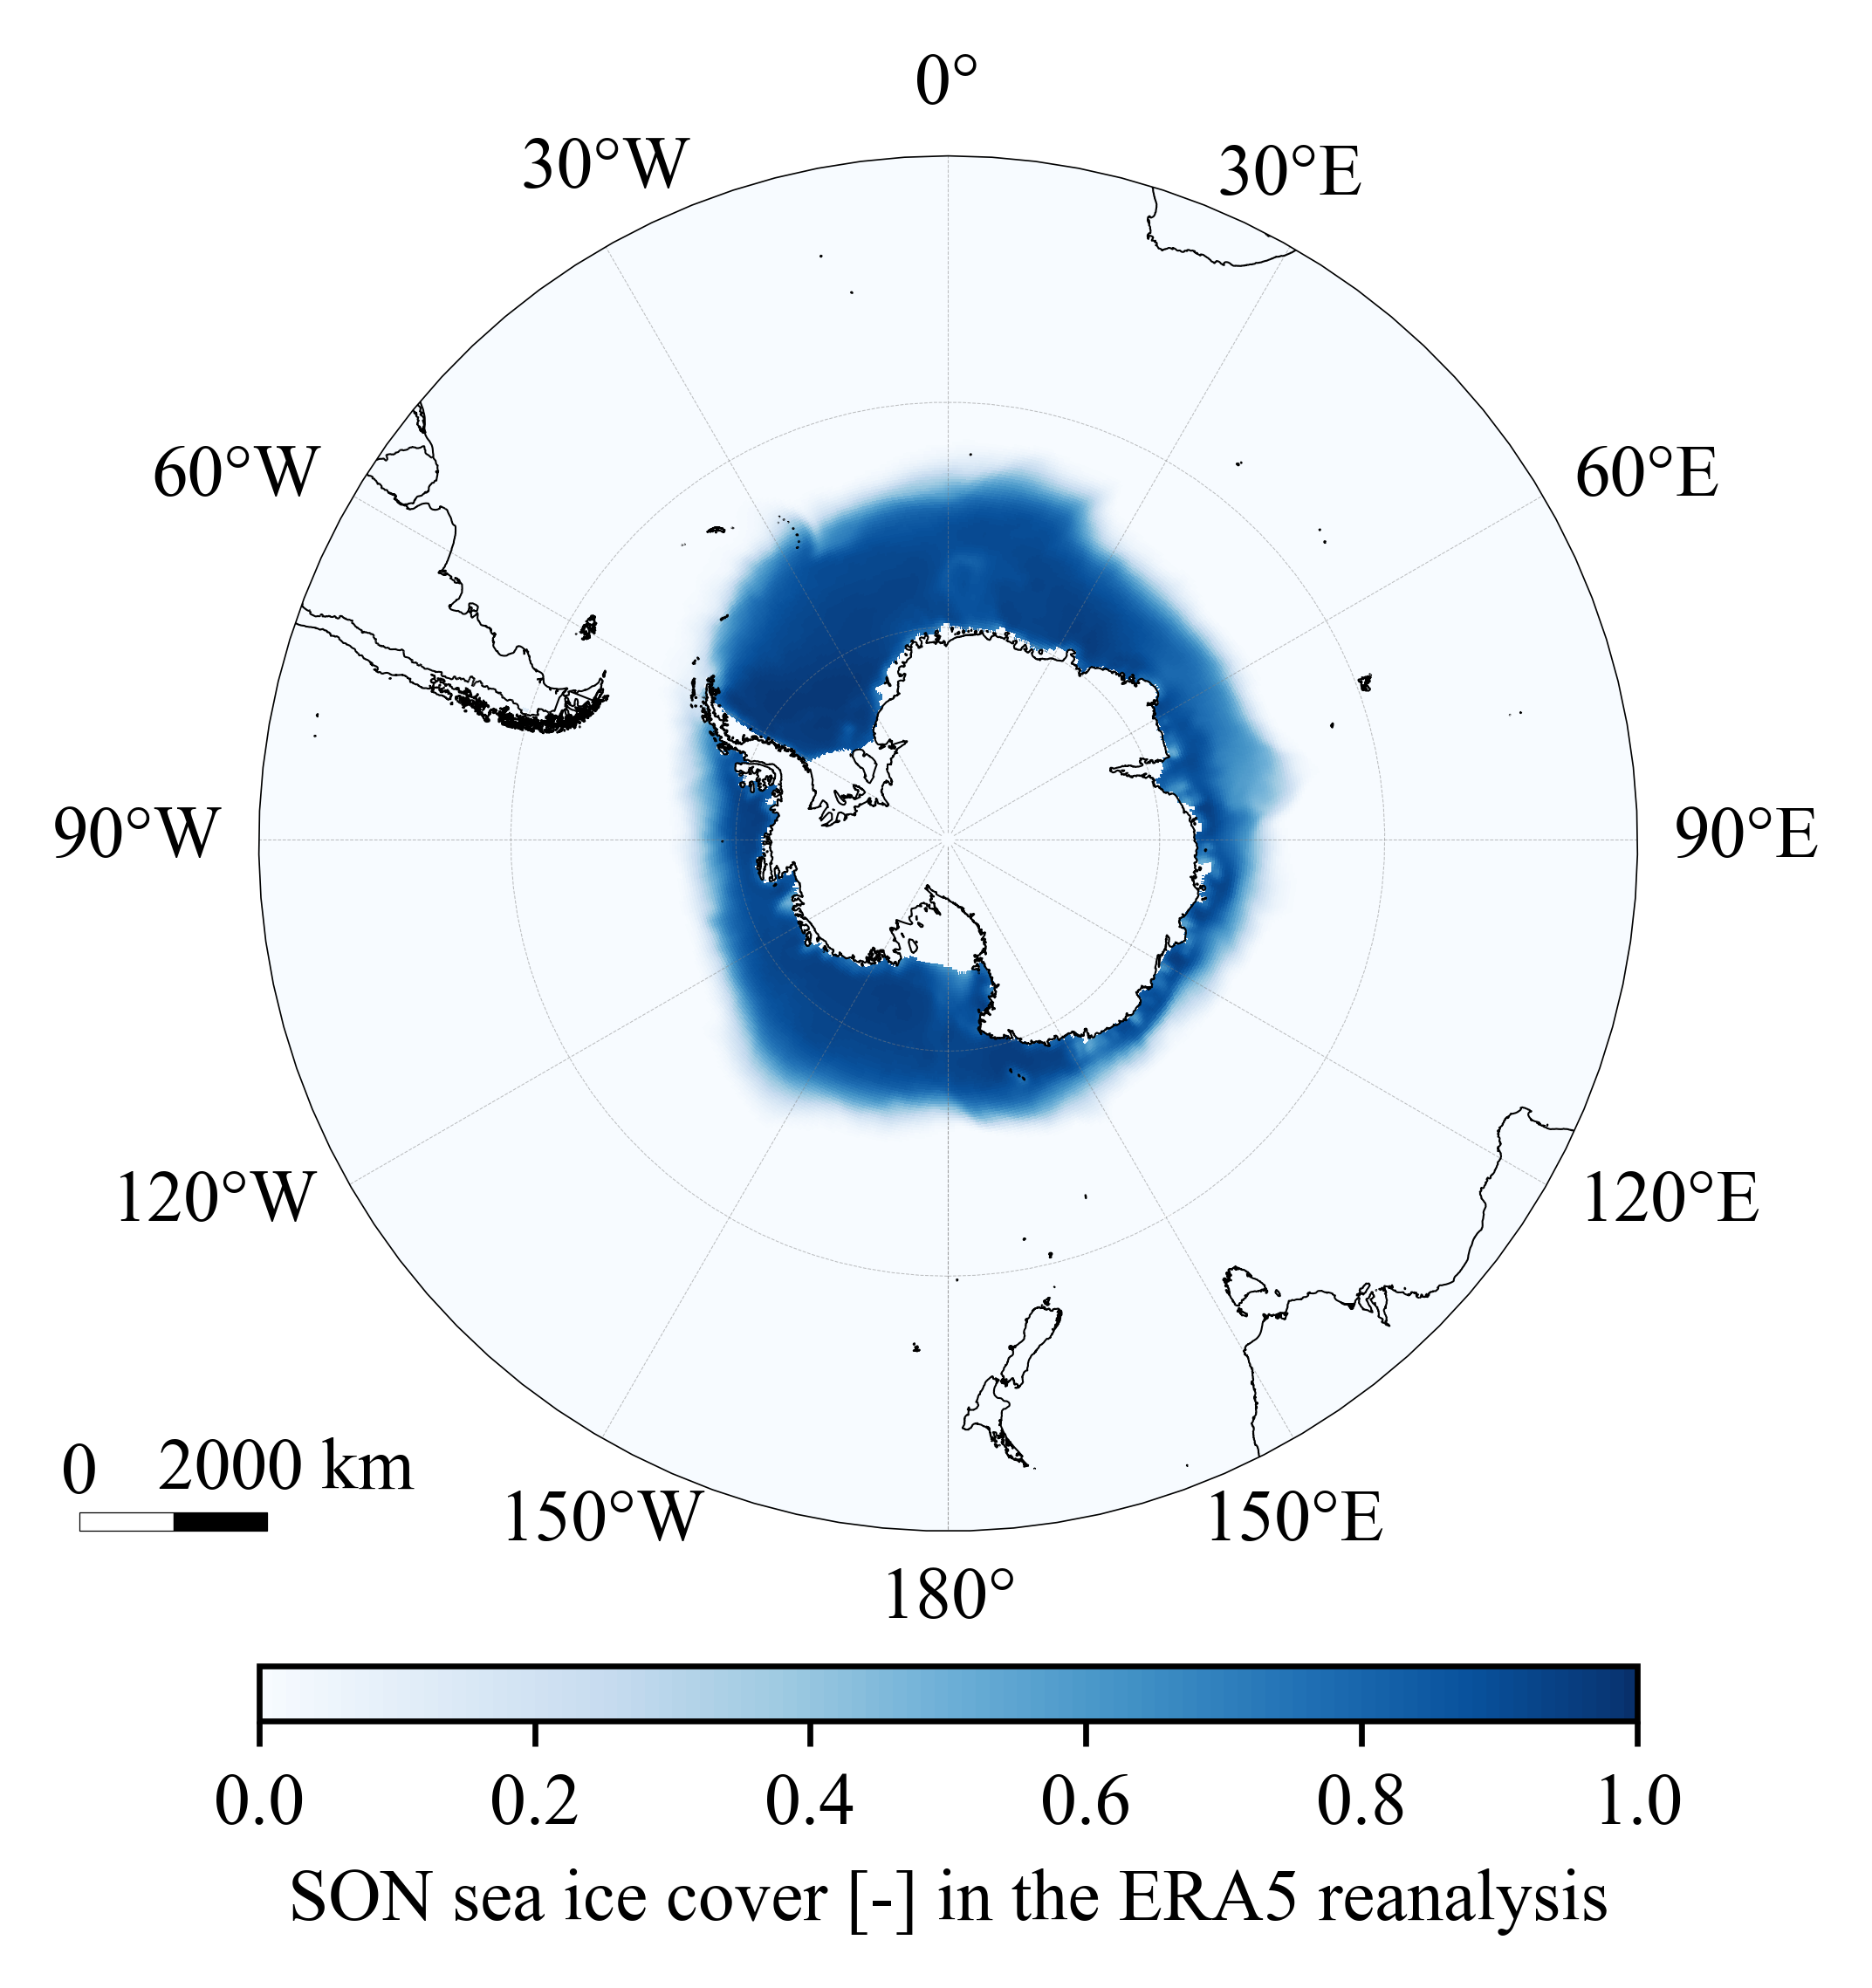

In [11]:
fig, ax = hemisphere_plot(northextent=-30, sb_length=2000, sb_barheight=200,)

plt_cmp = ax.pcolormesh(
    lon, lat[480:], siconc_weighted.sel(season='SON')[480:, ],
    norm=BoundaryNorm(pltlevel, ncolors=len(pltlevel), clip=False),
    cmap=cm.get_cmap('Blues', len(pltlevel)), rasterized=True,
    transform=ccrs.PlateCarree(),)
cbar = fig.colorbar(
    plt_cmp, ax=ax, orientation="horizontal",  pad=0.08, fraction=0.07,
    shrink=1, aspect=25, ticks=pltticks, extend='neither',
    anchor=(0.5, 1), panchor=(0.5, 0))
cbar.ax.set_xlabel("SON sea ice cover [-] in the ERA5 reanalysis")
plt.show()